<img src="data/bike-share.jpg" style="width:800px; height:400px"/>

# Bike Sharing Demand

https://www.kaggle.com/c/bike-sharing-demand

### Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as:

$$ \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (\log(p_i + 1) - (\log(a_i +1))^2 }$$
  

Where:
- n is the number of hours in the test set
- p_i is your predicted count
- a_i is the actual count
- log(x) is the natural logarithm


- RMSLE **gives more penalty to underfitting** than overfitting. 
- It's more accurate if the **RMSLE value is closer to 0.**

Since we are predicting bikeshare demand(count), we will study **regression supervised learning.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import missingno as msno

%matplotlib inline
#plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [3]:
#chagne datetime from object to datetime64
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


* `windspeed` column contains many 0 values. I believe that dealing with these 0 values will increase the submission score

In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.isnull().sum() #no null value is good

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

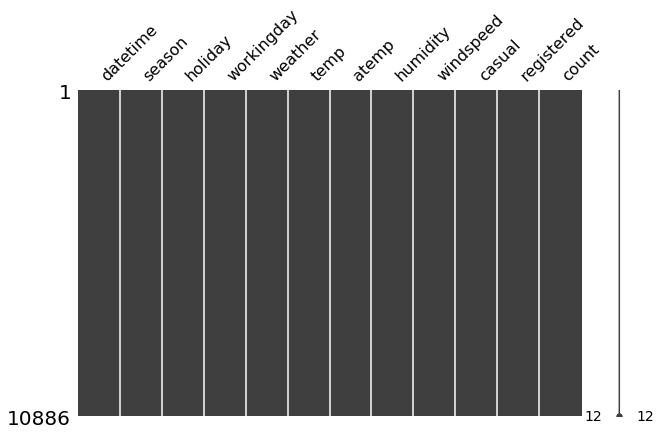

In [7]:
# double-check that there's no missing value
msno.matrix(df, figsize=(10,6));

In [8]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


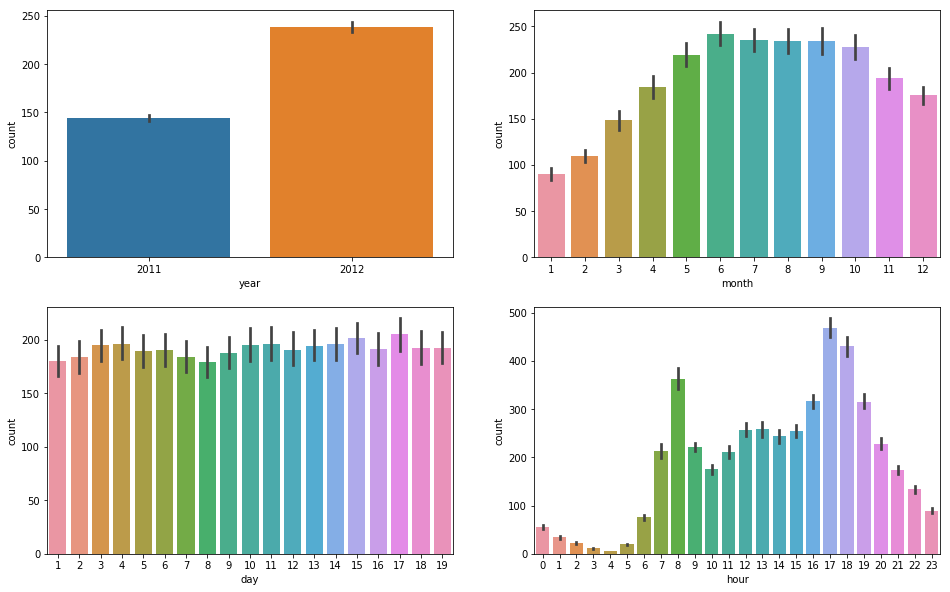

In [9]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
figure.set_size_inches(16,10)

sb.barplot(data=df, x="year", y="count", ax=ax1)
sb.barplot(data=df, x="month", y="count", ax=ax2)
sb.barplot(data=df, x="day", y="count", ax=ax3)
sb.barplot(data=df, x="hour", y="count", ax=ax4);

* Rental amount by year: 2012 > 2011
* Monthly Rentals: June is the highest, and then July- October. Lowest on January
* Daily Rental: Only 1st to 19th presented. The rest is in `test.csv`. We shouldn't use this graph for daily rental
* It's pretty obvious that people use bikesharing for commute to work. We just need to compare weekdays and weekend.

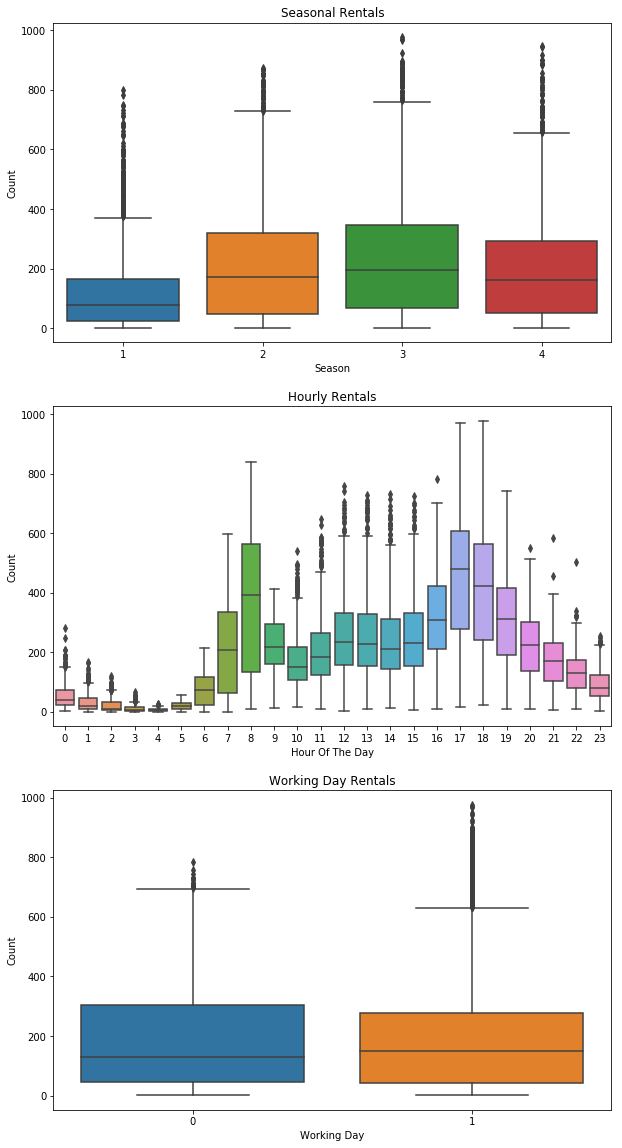

In [10]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(10, 20)
sb.boxplot(data=df, y="count", x="season",orient="v", ax=ax1).set(xlabel='Season', ylabel='Count',title="Seasonal Rentals")
sb.boxplot(data=df, y="count", x="hour", orient="v", ax=ax2).set(xlabel='Hour Of The Day', ylabel='Count',title="Hourly Rentals")
sb.boxplot(data=df, y="count", x="workingday", orient="v", ax=ax3).set(xlabel='Working Day', ylabel='Count',title="Working Day Rentals");

In [11]:
df['days'] = df['datetime'].dt.dayofweek # 0:Monday 1:Tuesday,..., 6:Sunday

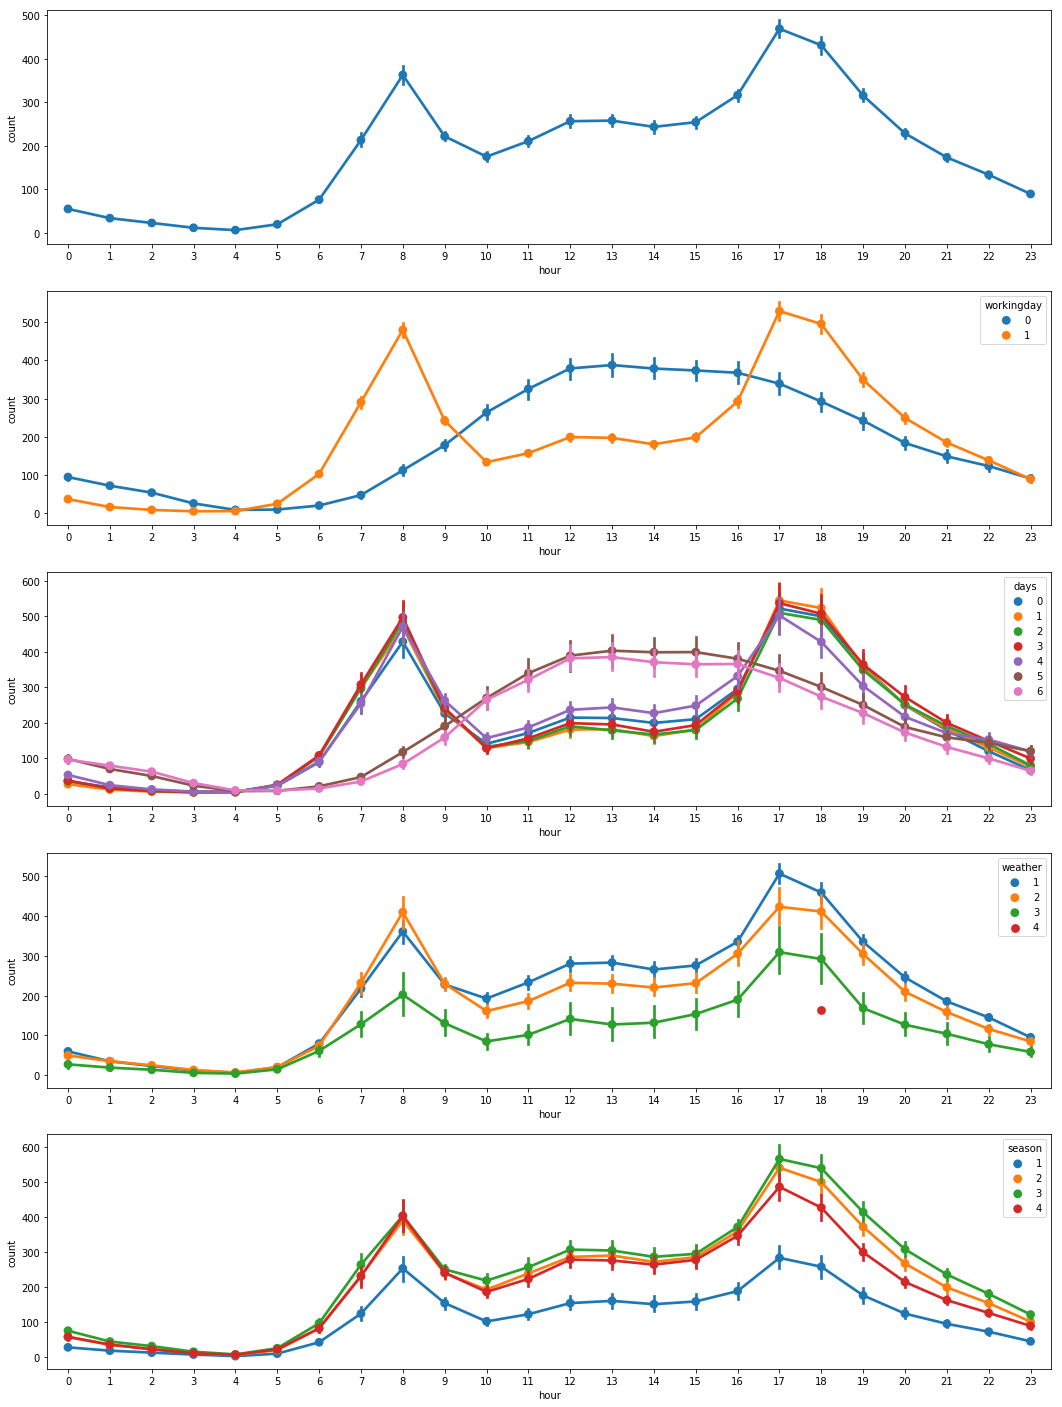

In [12]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sb.pointplot(data=df, x="hour", y="count", ax=ax1)
sb.pointplot(data=df, x="hour", y="count", hue="workingday", ax=ax2)
sb.pointplot(data=df, x="hour", y="count", hue="days", ax=ax3)
sb.pointplot(data=df, x="hour", y="count", hue="weather", ax=ax4)
sb.pointplot(data=df, x="hour", y="count", hue="season", ax=ax5);

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(14, 7)
sb.regplot(x="temp", y="count", data=df, ax=ax1)
sb.regplot(x="windspeed", y="count", data=df, ax=ax2)
sb.regplot(x="humidity", y="count", data=df, ax=ax3);

* Again, I can see that many 0 values for windspeed. We will use feature engineering to deal with it

In [ ]:
def concat_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

df["year_month"] = df["datetime"].apply(concat_year_month)
df[["datetime", "year_month"]].tail()

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2)
fig.set_size_inches(15,5)

sb.barplot(x='year', y='count', data=df, ax=ax1)
sb.barplot(x='month', y='count', data=df, ax=ax2);

In [ ]:
fig = plt.figure(figsize=(20,8))
sb.barplot(x='year_month', y='count', data=df);

* The number of rentals in 2012 is much higher than 2011
* Customers rent bikes a lot more in Summer (June to October)
* The number of rentals graudally increases over time. 

In [ ]:
# trainWithoutOutliers
df_NoOutliers = df[np.abs(df["count"] - df["count"].mean()) <= (3 * df["count"].std())]

In [ ]:
# Check the distribution of count values
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sb.distplot(df["count"], ax=axes[0][0])
sb.distplot(np.log(df_NoOutliers["count"]), ax=axes[1][0])
stats.probplot(df["count"], dist='norm', fit=True, plot=axes[0][1])
stats.probplot(np.log1p(df_NoOutliers["count"]), dist='norm', fit=True, plot=axes[1][1]);

#### References:

- https://stageintelligence.co.uk/2017/11/14/stage-intelligences-usability-data-reveals-need-better-bike-share-scheme-management/
- https://matplotlib.org/gallery/api/unicode_minus.html
- https://seaborn.pydata.org/generated/seaborn.pointplot.html
- https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile